In [21]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

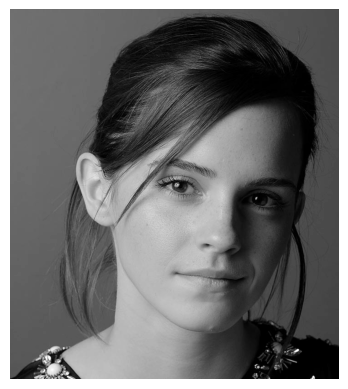

In [22]:
img = cv.imread("Images\emma.jpg", cv.IMREAD_GRAYSCALE)
assert img is not None

plt.imshow(img, cmap = "gray")
plt.axis('off')  # Turn off axis labels
plt.show()

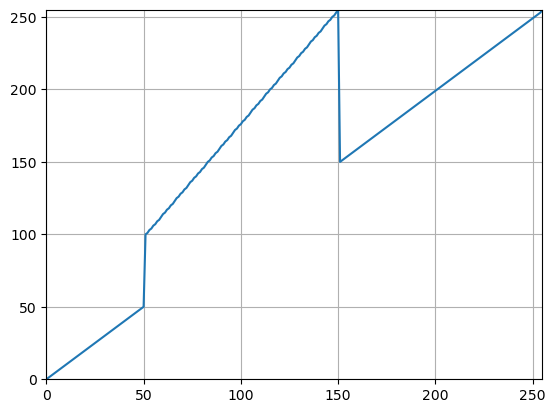

In [23]:
t1 = np.linspace(0, 50 ,51).astype('uint8')
t2 = np.linspace(100, 255, 100).astype('uint8')
t3 = np.linspace(150, 255, 255-150).astype('uint8')

transform = np.concatenate((t1,t2),axis=0).astype('uint8')
transform = np.concatenate((transform, t3),axis=0).astype('uint8')

plt.plot(transform)
plt.xlim(0,255)
plt.ylim(0,255)
plt.grid(True)
plt.show()

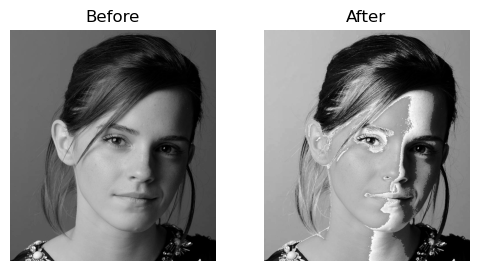

In [24]:
transformed_img = transform[img]

plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.imshow(img, cmap = "gray")
plt.title('Before')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(transformed_img, cmap = "gray")
plt.axis('off')
plt.title('After')
plt.show()


2

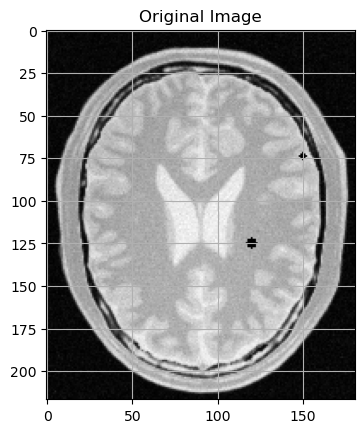

white matter:  164
gray matter:  172


In [25]:
img = cv.imread("Images\\brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
assert img is not None

img2 = img.copy()

cv.circle(img2, (120, 125), 3, (0, 0, 0), -1)
cv.circle(img2, (150, 74), 2, (0, 0, 0), -1)

plt.imshow(img2, cmap='gray')
plt.title('Original Image')
plt.grid('True')
plt.show()

print('white matter: ', img[120, 125])
print('gray matter: ',img[150, 74])

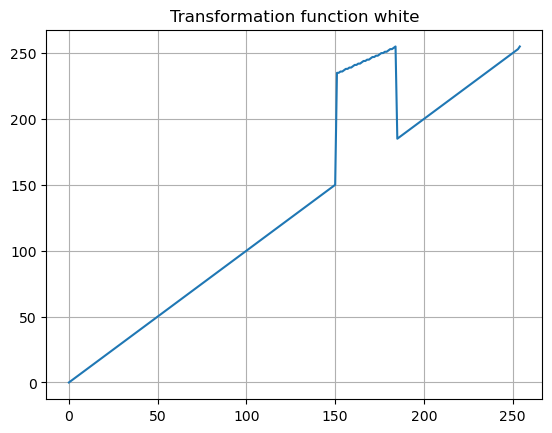

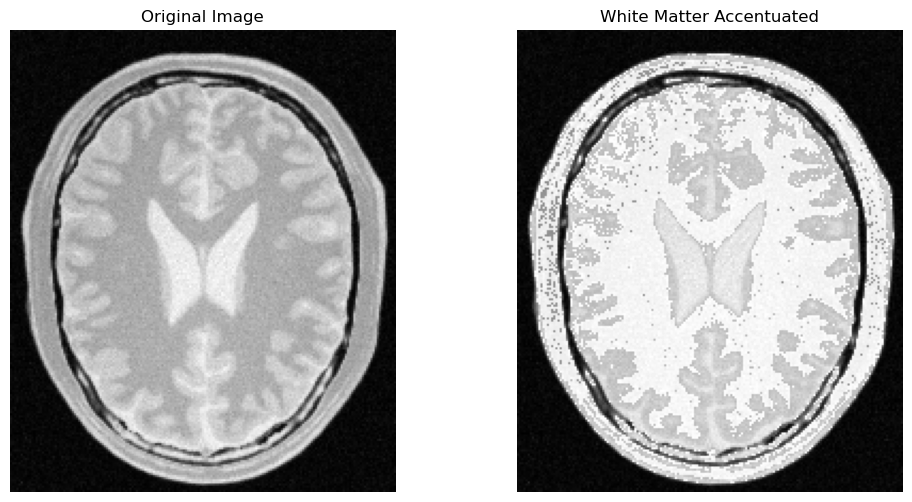

In [26]:
img = cv.imread("Images\\brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0, 150, 151).astype('uint8')
t2 = np.linspace(235, 255, 185-151).astype('uint8')
t3 = np.linspace(185, 255, 255-185).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

transformed_img = transform[img]


plt.plot(transform)
plt.title('Transformation function white')
plt.grid(True)

plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_img, cmap='gray')
plt.title('White Matter Accentuated')
plt.axis('off')

plt.show()

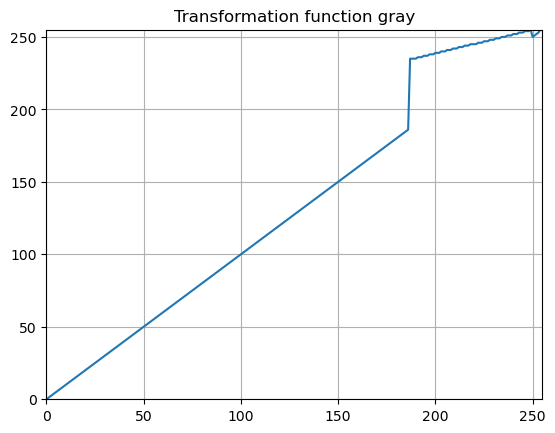

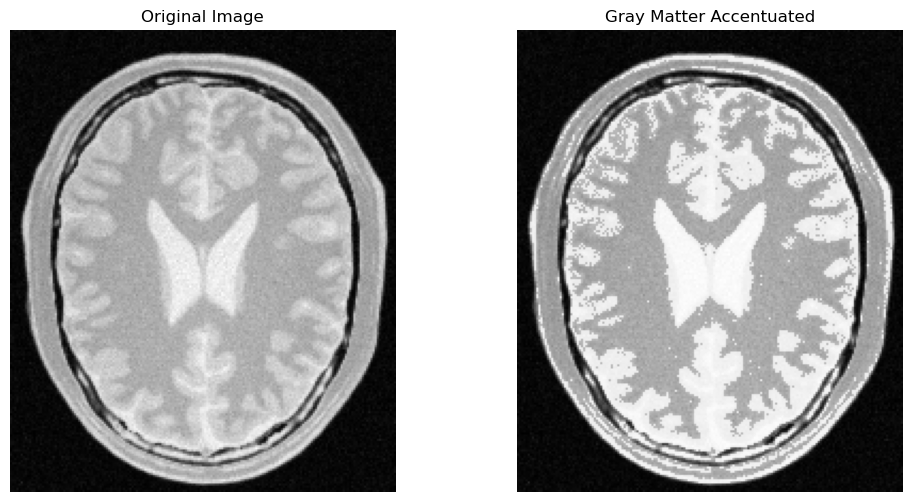

In [27]:
img = cv.imread("Images\\brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0, 186, 187).astype('uint8')
t2 = np.linspace(235, 255, 250-187).astype('uint8')
t3 = np.linspace(250, 255, 255-250).astype('uint8')
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transformed_img = transform[img]

plt.plot(transform)
plt.title('Transformation function gray')
plt.xlim(0,255)
plt.ylim(0,255)
plt.grid(True)

plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(transformed_img, cmap='gray')
plt.title('Gray Matter Accentuated')
plt.axis('off')

plt.show()

3

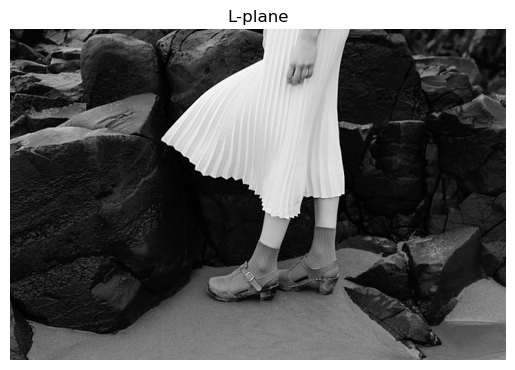

In [28]:

img = cv.imread('Images\highlights_and_shadows.jpg')
lab_image = cv.cvtColor(img, cv.COLOR_BGR2Lab)

# Split the Lab image into its L, a, and b components
L, a, b = cv.split(lab_image)

plt.imshow(L, cmap='gray')
plt.title('L-plane')
plt.axis('off')
plt.show()


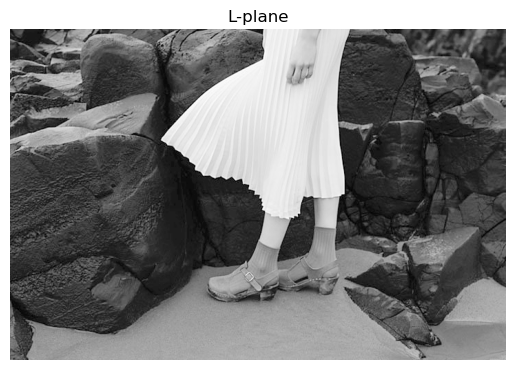

In [29]:
gemma = 0.6
g = np.array([((i/255.0)**gemma)*255 for i in L]).astype(np.uint8)
t = np.array([((i/255.0)**gemma)*255 for i in range(256)]).astype(np.uint8)

g2 = t[L]

plt.imshow(g2, cmap='gray')
plt.title('L-plane')
plt.axis('off')
plt.show()


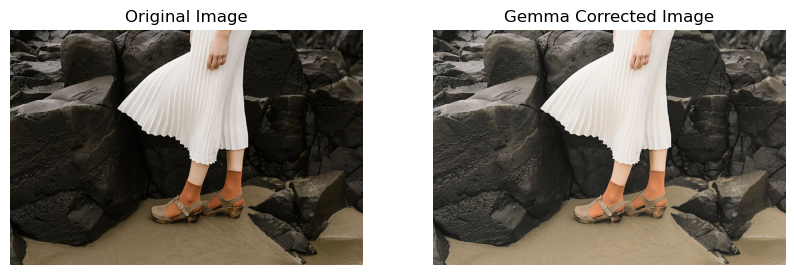

In [30]:
final_img = cv.merge([g2, a, b])
final_img_rgb = cv.cvtColor(final_img, cv.COLOR_LAB2RGB)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(final_img_rgb)
plt.title('Gemma Corrected Image')
plt.axis('off')

plt.show()

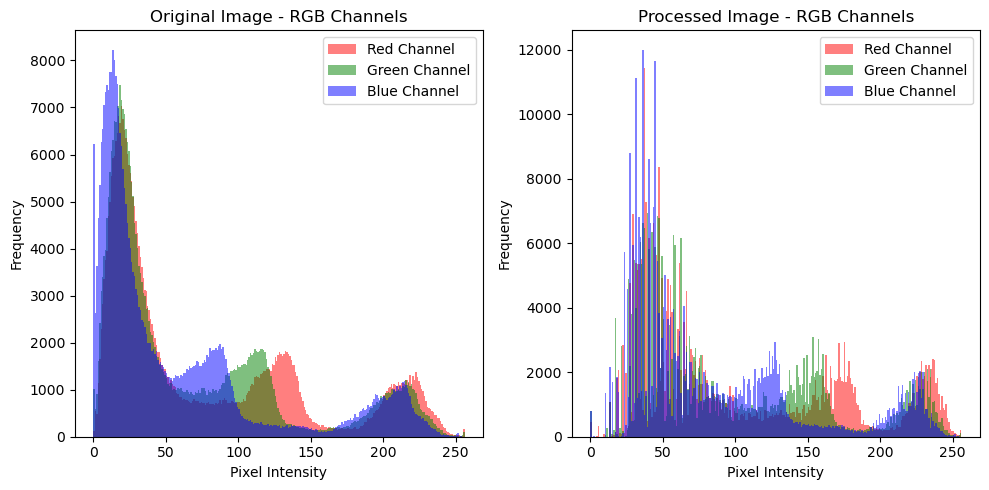

In [31]:
b1, g1, r1 = cv.split(img)
r2, g2, b2 = cv.split(final_img_rgb)

# Create a figure and subplots
plt.figure(figsize=(10, 5))

# Plot stacked histograms for RGB channels
plt.subplot(1, 2, 1)
plt.hist(r1.ravel(), bins=256, range=(0, 256), color='red', alpha=0.5, label='Red Channel')
plt.hist(g1.ravel(), bins=256, range=(0, 256), color='green', alpha=0.5, label='Green Channel')
plt.hist(b1.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.5, label='Blue Channel')
plt.title('Original Image - RGB Channels')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Example to show the histogram of another image or processed image
# This can be updated based on your specific needs
plt.subplot(1, 2, 2)
plt.hist(r2.ravel(), bins=256, range=(0, 256), color='red', alpha=0.5, label='Red Channel')
plt.hist(g2.ravel(), bins=256, range=(0, 256), color='green', alpha=0.5, label='Green Channel')
plt.hist(b2.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.5, label='Blue Channel')
plt.title('Processed Image - RGB Channels')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

4

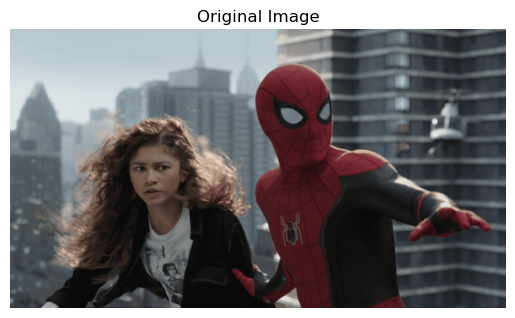

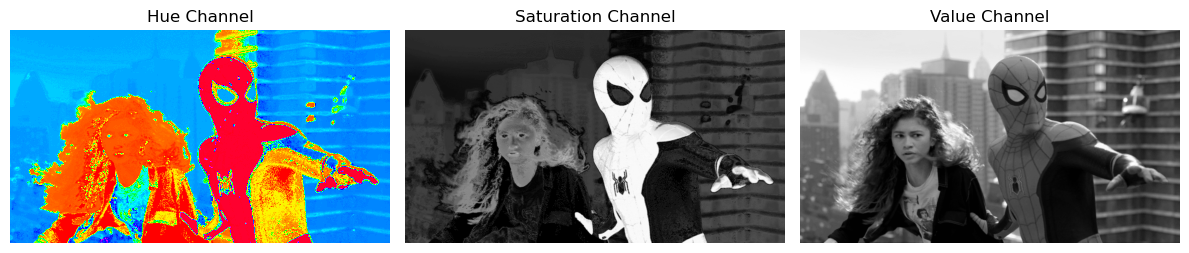

In [32]:
img = cv.imread('Images\spider.png')
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hue, saturation, value = cv.split(hsv_img)

# Original image
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.figure(figsize=(12, 8))
# Hue channel
plt.subplot(1, 3, 1)
plt.imshow(hue, cmap='hsv')
plt.title('Hue Channel')
plt.axis('off')

# Saturation channel
plt.subplot(1,3,2)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

# Value (Vibrancy) channel
plt.subplot(1,3,3)
plt.imshow(value, cmap='gray')
plt.title('Value Channel')
plt.axis('off')

plt.tight_layout()
plt.show()


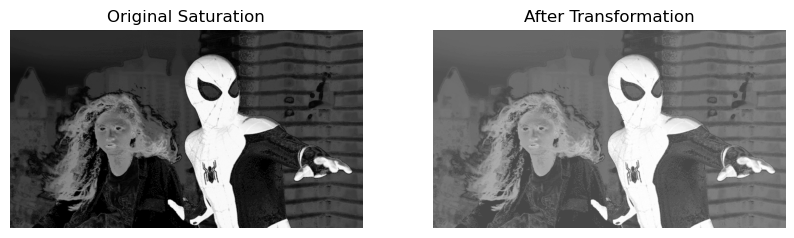

In [33]:
a = 0.55
sigma = 70

f = np.array([i + a*128*np.exp(((i-128)**2)/(2*sigma**2)) for i in saturation]).astype(np.uint8)
f = np.clip(f,0,255)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(saturation, cmap='gray')
plt.title('Original Saturation')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(f, cmap='gray')
plt.title('After Transformation')
plt.axis('off')

plt.show()

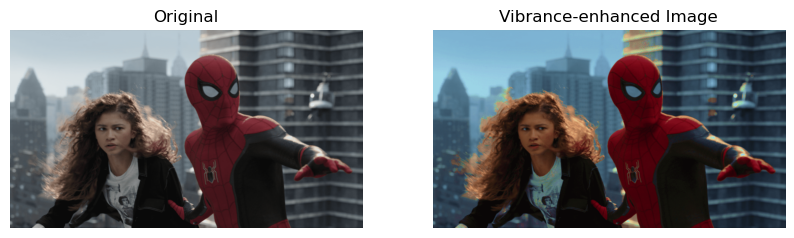

In [34]:
merged_hsv = cv.merge([hue, f, value])

merged_bgr = cv.cvtColor(merged_hsv, cv.COLOR_HSV2BGR)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(merged_bgr, cv.COLOR_BGR2RGB))
plt.title('Vibrance-enhanced Image')
plt.axis('off')

plt.show()

5

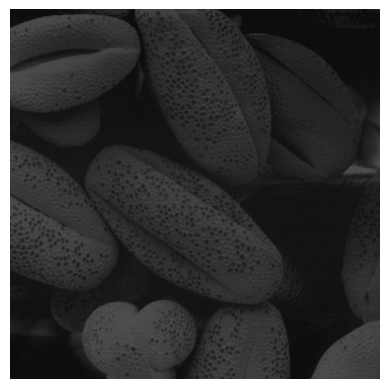

In [35]:
img = cv.imread('Images\shells.tif')
assert img is not None

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


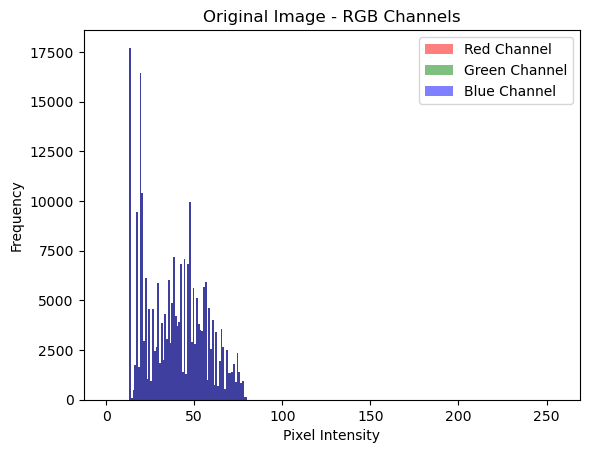

In [36]:
b1, g1, r1 = cv.split(img)

# Create a figure and subplots

plt.hist(r1.ravel(), bins=256, range=(0, 256), color='red', alpha=0.5, label='Red Channel')
plt.hist(g1.ravel(), bins=256, range=(0, 256), color='green', alpha=0.5, label='Green Channel')
plt.hist(b1.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.5, label='Blue Channel')
plt.title('Original Image - RGB Channels')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

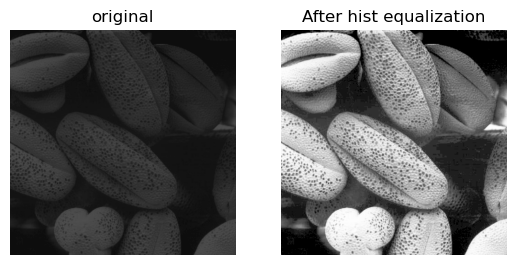

In [37]:
def hist_eq(X):
    L = 256
    MN = X.shape[0]*X.shape[1]
    hist = cv.calcHist([X], [0], None, [256], [0, 256])    
    s = []
    for i in range(256):
        s.append((L-1)*np.sum(hist[:i])/MN)
    eq = np.array(s).astype(np.uint8)
    return eq[X]

eq_img = hist_eq(img)

plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(eq_img, cv.COLOR_BGR2RGB))
plt.title('After hist equalization')
plt.axis('off')
plt.show()

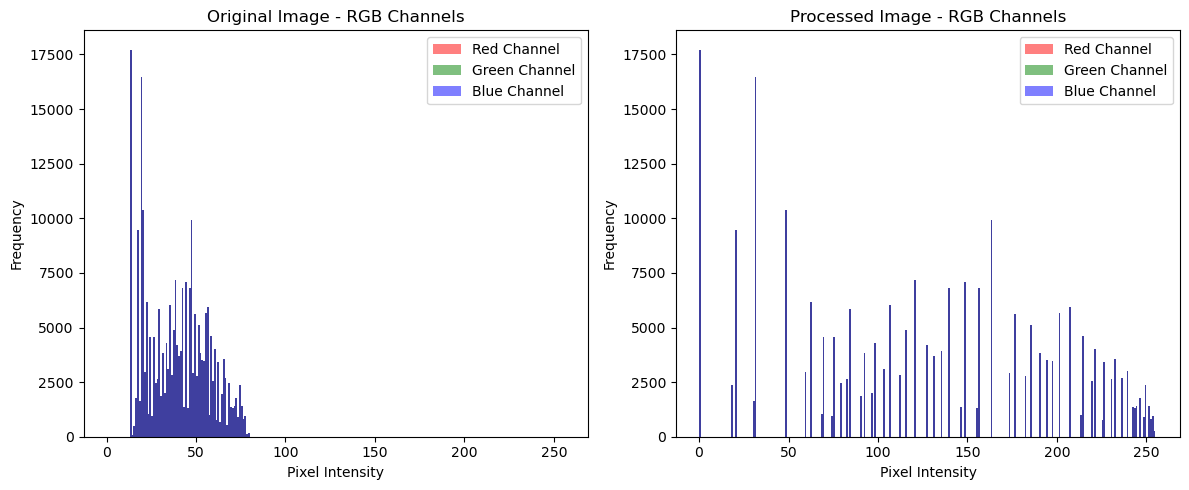

In [38]:
b1, g1, r1 = cv.split(img)
b2, g2, r2 = cv.split(eq_img)

# Create a figure and subplots
plt.figure(figsize=(12, 5))

# Plot stacked histograms for RGB channels
plt.subplot(1, 2, 1)
plt.hist(r1.ravel(), bins=256, range=(0, 256), color='red', alpha=0.5, label='Red Channel')
plt.hist(g1.ravel(), bins=256, range=(0, 256), color='green', alpha=0.5, label='Green Channel')
plt.hist(b1.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.5, label='Blue Channel')
plt.title('Original Image - RGB Channels')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Example to show the histogram of another image or processed image
# This can be updated based on your specific needs
plt.subplot(1, 2, 2)
plt.hist(r2.ravel(), bins=256, range=(0, 256), color='red', alpha=0.5, label='Red Channel')
plt.hist(g2.ravel(), bins=256, range=(0, 256), color='green', alpha=0.5, label='Green Channel')
plt.hist(b2.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.5, label='Blue Channel')
plt.title('Processed Image - RGB Channels')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

6

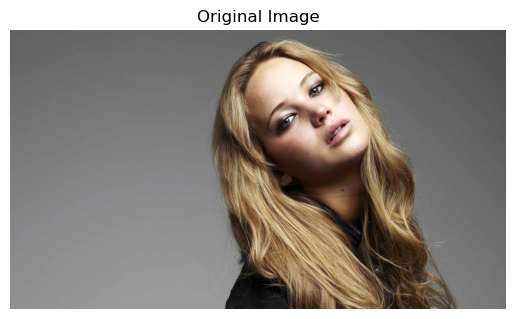

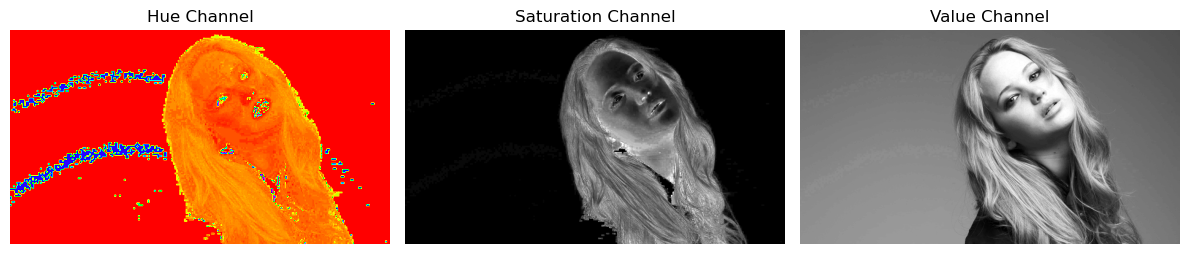

In [39]:
img = cv.imread("Images\jeniffer.jpg")
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

hue, saturation, value = cv.split(hsv_img)


# Original image
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.figure(figsize=(12, 8))
# Hue channel
plt.subplot(1, 3, 1)
plt.imshow(hue, cmap='hsv')
plt.title('Hue Channel')
plt.axis('off')

# Saturation channel
plt.subplot(1,3,2)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

# Value (Vibrancy) channel
plt.subplot(1,3,3)
plt.imshow(value, cmap='gray')
plt.title('Value Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

(-0.5, 3839.5, 2159.5, -0.5)

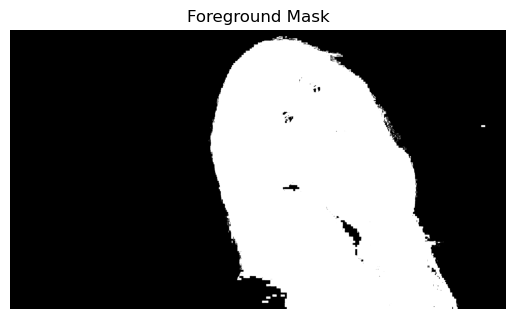

In [40]:
_,binary_mask = cv.threshold(saturation, 11, 255, cv.THRESH_BINARY)

plt.imshow(binary_mask, cmap='gray')
plt.title('Foreground Mask')
plt.axis('off')

(-0.5, 3839.5, 2159.5, -0.5)

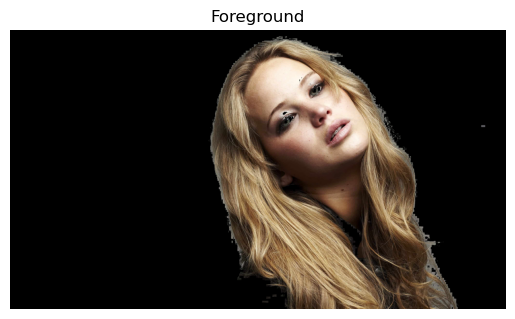

In [41]:
foreground = cv.bitwise_and(img, img, mask=binary_mask)

plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Foreground')
plt.axis('off')

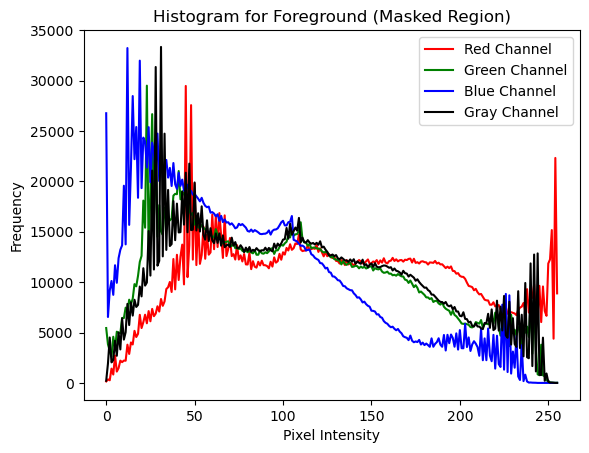

In [42]:
b, g, r = cv.split(foreground)

r_hist = cv.calcHist([r], [0], binary_mask, [256], [0, 256])
g_hist = cv.calcHist([g], [0], binary_mask, [256], [0, 256])
b_hist = cv.calcHist([b], [0], binary_mask, [256], [0, 256])

gray_hist = cv.calcHist([cv.cvtColor(foreground, cv.COLOR_BGR2GRAY)], [0], binary_mask, [256], [0, 256])

plt.plot(r_hist, color='r', label='Red Channel')
plt.plot(g_hist, color='g', label='Green Channel')
plt.plot(b_hist, color='b', label='Blue Channel')
plt.plot(gray_hist, color='black', label='Gray Channel')

plt.title('Histogram for Foreground (Masked Region)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

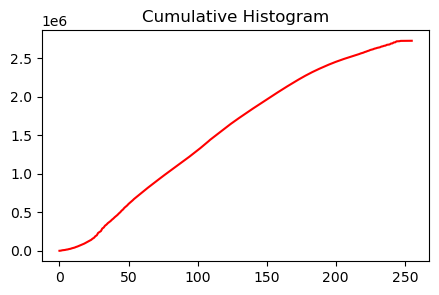

In [43]:
cumulative_hist = np.cumsum(gray_hist)

plt.figure(figsize=(5,3))

plt.plot(cumulative_hist, color='red')
plt.title('Cumulative Histogram')
plt.show()


(-0.5, 3839.5, 2159.5, -0.5)

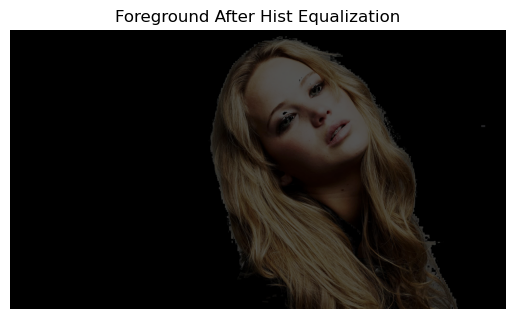

In [44]:
def hist_eq(X):
    L = 256
    MN = X.shape[0]*X.shape[1]    
    s = []
    for i in range(256):
        s.append((L-1)*cumulative_hist[i]/MN)
    eq = np.array(s).astype(np.uint8)
    return eq[X]

foreground_eq = hist_eq(foreground)

plt.imshow(cv.cvtColor(foreground_eq, cv.COLOR_BGR2RGB))
plt.title('Foreground After Hist Equalization')
plt.axis('off')

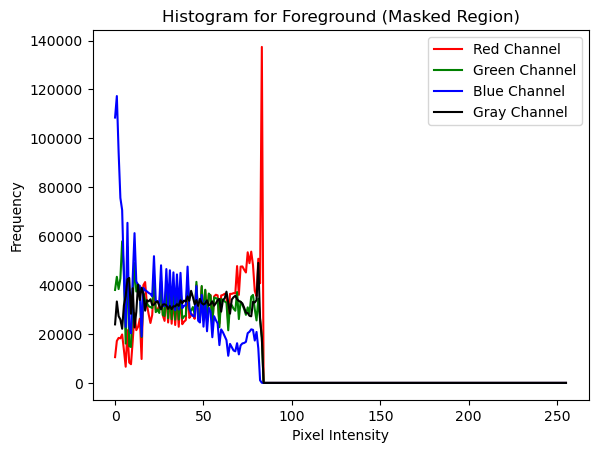

In [45]:
b, g, r = cv.split(foreground_eq)

r_hist = cv.calcHist([r], [0], binary_mask, [256], [0, 256])
g_hist = cv.calcHist([g], [0], binary_mask, [256], [0, 256])
b_hist = cv.calcHist([b], [0], binary_mask, [256], [0, 256])

gray_hist = cv.calcHist([cv.cvtColor(foreground_eq, cv.COLOR_BGR2GRAY)], [0], binary_mask, [256], [0, 256])

plt.plot(r_hist, color='r', label='Red Channel')
plt.plot(g_hist, color='g', label='Green Channel')
plt.plot(b_hist, color='b', label='Blue Channel')
plt.plot(gray_hist, color='black', label='Gray Channel')

plt.title('Histogram for Foreground (Masked Region)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

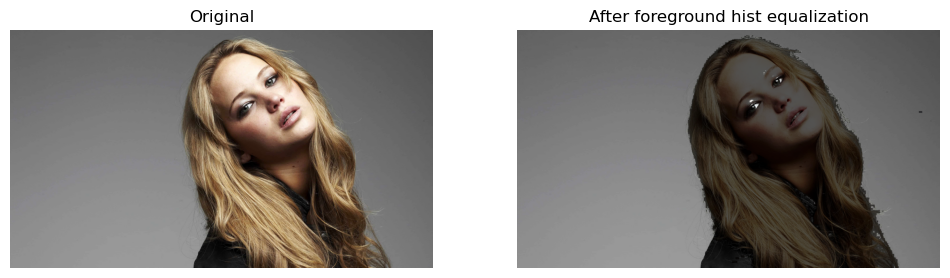

In [46]:
background_mask = ~binary_mask
background = cv.bitwise_and(img, img, mask=background_mask)

full_image = cv.add(foreground_eq, background)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(full_image, cv.COLOR_BGR2RGB))
plt.title('After foreground hist equalization')
plt.axis('off')

plt.show()

7

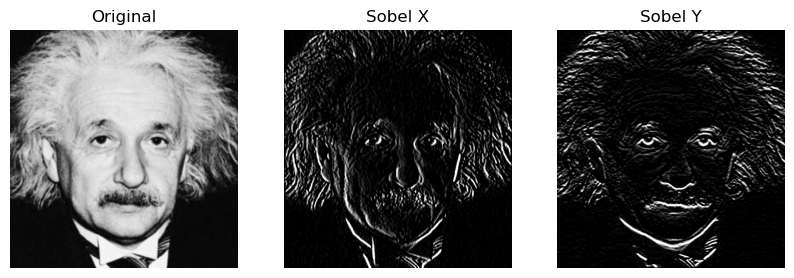

In [47]:
img = cv.imread("Images\einstein.png", cv.IMREAD_GRAYSCALE)
assert img is not None

sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[-1, -2, -1], 
                    [ 0,  0,  0], 
                    [ 1,  2,  1]], dtype=np.float32)

sobel_filtered_x = cv.filter2D(img, -1, sobel_x)
sobel_filtered_y = cv.filter2D(img, -1, sobel_y)

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(sobel_filtered_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(sobel_filtered_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.show()

In [48]:
def convolve(img, kernal):
    kernal_hw = int(kernal.shape[0]/2)
    padded_img = cv.copyMakeBorder(  img, 
                                      top=kernal_hw, 
                                      bottom=kernal_hw, 
                                      left=kernal_hw, 
                                      right=kernal_hw, 
                                      borderType=cv.BORDER_REFLECT)
    img_convolved = np.zeros_like(img, dtype=np.float64)
    kernal_flipped = cv.flip(kernal, -1)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded_img[i:i+kernal.shape[0], j:j+kernal.shape[1]]
            img_convolved[i, j] = np.sum(region * kernal_flipped)
      
    return np.uint8(np.abs(img_convolved))




(-0.5, 363.5, 379.5, -0.5)

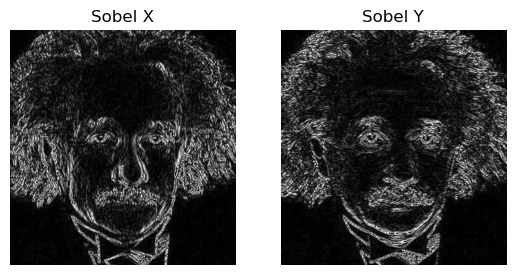

In [49]:
filtered_x = convolve(img,sobel_x)
filtered_y = convolve(img,sobel_y)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(filtered_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(filtered_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

(-0.5, 363.5, 379.5, -0.5)

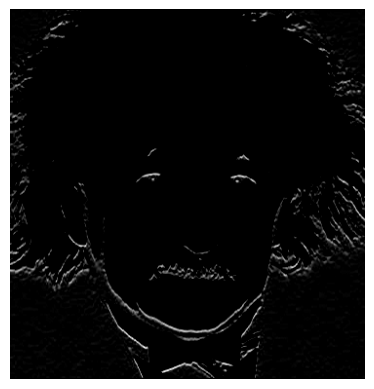

In [50]:
a = np.array([1, 2, 1])  
b = np.array([1, 0, -1]) 

sobel_x1 = cv.filter2D(img,-1,a)
sobel_x2 = cv.filter2D(sobel_x1,-1,b)

plt.imshow(sobel_x2, cmap='gray')
plt.axis('off')                                

8


In [51]:
img1 = cv.imread('Images\images2\im01small.png')
img1_lrg = cv.imread('Images\images2\im01.png')

img2 = cv.imread('Images\images2\im02small.png')
img2_lrg = cv.imread('Images\images2\im02.png')

img3 = cv.imread('Images\images2\im03small.png')
img3_lrg = cv.imread('Images\images2\im02.png')


assert img3 is not None

def zoom_image(img, scale, interpolation='bilinear'):
    
    height, width = img.shape[:2]
    
    new_width = int(width * scale)
    new_height = int(height * scale)

    if interpolation == 'nearest':
        interpolation_method = cv.INTER_NEAREST
    elif interpolation == 'bilinear':
        interpolation_method = cv.INTER_LINEAR
    else:
        raise ValueError("Interpolation method must be 'nearest' or 'bilinear'")
    
    zoomed_img = cv.resize(img, (new_width, new_height), interpolation=interpolation_method)
    
    return zoomed_img


def normalize_ssd(original_img, scaled_img):
    assert original_img.shape == scaled_img.shape, "Images must be the same size."
    ssd = np.sum((original_img - scaled_img) ** 2)
    n_pixels = original_img.size
    normalized_ssd = ssd / n_pixels
    
    return round(normalized_ssd, 2)



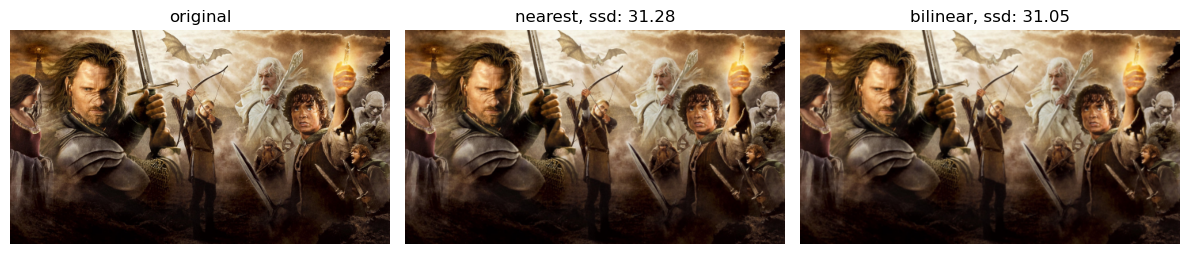

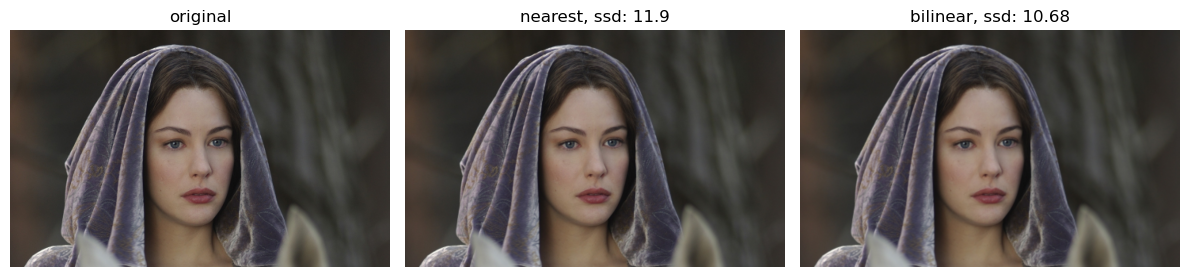

In [52]:
img1_scaled_nearest = zoom_image(img1, 4, interpolation='nearest')
img1_scaled_bilinear = zoom_image(img1, 4, interpolation='bilinear')
img1_ssd_nearest = normalize_ssd(img1_lrg, img1_scaled_nearest)
img1_ssd_bilinear = normalize_ssd(img1_lrg, img1_scaled_bilinear)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.title('original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(cv.cvtColor(img1_scaled_nearest, cv.COLOR_BGR2RGB))
plt.title(f'nearest, ssd: {img1_ssd_nearest}')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(img1_scaled_bilinear, cv.COLOR_BGR2RGB))
plt.title(f'bilinear, ssd: {img1_ssd_bilinear}')
plt.axis('off')

plt.tight_layout()
plt.show()

img2_scaled_nearest = zoom_image(img2, 4, interpolation='nearest')
img2_scaled_bilinear = zoom_image(img2, 4, interpolation='bilinear')
img2_ssd_nearest = normalize_ssd(img2_lrg, img2_scaled_nearest)
img2_ssd_bilinear = normalize_ssd(img2_lrg, img2_scaled_bilinear)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.title('original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(cv.cvtColor(img2_scaled_nearest, cv.COLOR_BGR2RGB))
plt.title(f'nearest, ssd: {img2_ssd_nearest}')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(img2_scaled_bilinear, cv.COLOR_BGR2RGB))
plt.title(f'bilinear, ssd: {img2_ssd_bilinear}')
plt.axis('off')

plt.tight_layout()
plt.show()



9

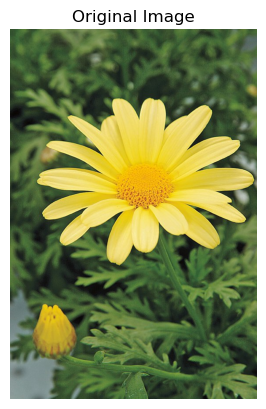

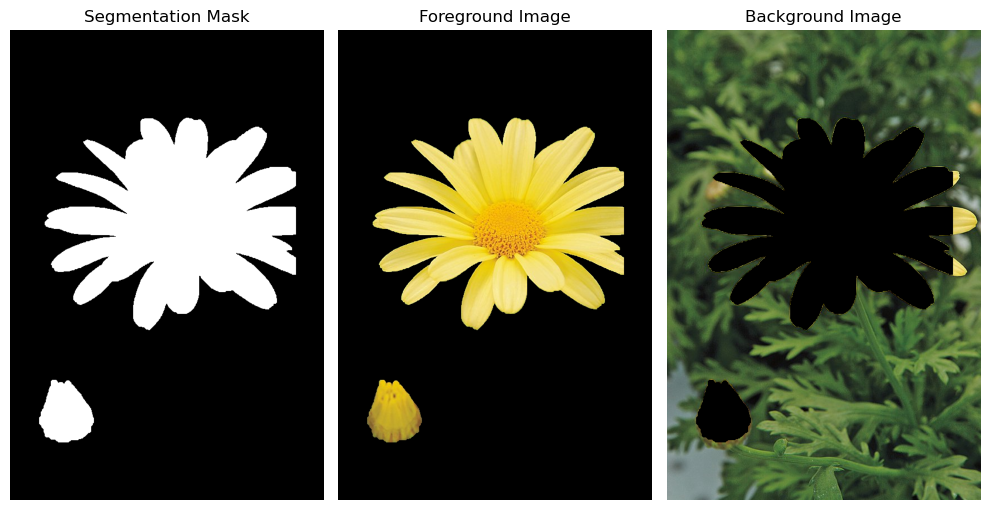

In [53]:
img = cv.imread('Images\daisy.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

rect = (50, 50, img.shape[1] - 100, img.shape[0] - 100)

mask = np.zeros(img.shape[:2], dtype=np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)


cv.grabCut(img, mask, rect, bgdModel, fgdModel, 20, cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

foreground = img_rgb * mask2[:, :, np.newaxis]

background = img_rgb.copy()
background[mask2 == 1] = [0, 0, 0] 


plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.figure(figsize=(10, 5))

plt.subplot(1,3,1)
plt.imshow(mask2, cmap='gray')
plt.title('Segmentation Mask')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(foreground)
plt.title('Foreground Image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(background)
plt.title('Background Image')
plt.axis('off')

plt.tight_layout()
plt.show()

(-0.5, 560.5, 840.5, -0.5)

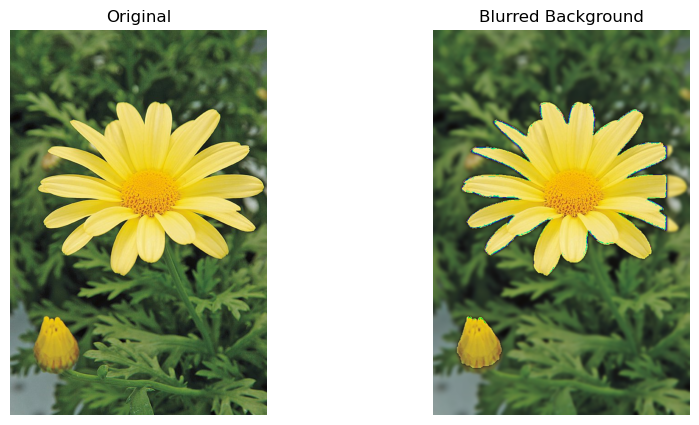

In [54]:
blurred_bkg = cv.GaussianBlur(background, (15, 15), 0)

final_img = foreground+ blurred_bkg

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(final_img)
plt.title('Blurred Background')
plt.axis('off')